C:\Users\Kunal\AppData\Local\Temp\ipykernel_13264\2881164626.py:15: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['date'], errors='coerce')
C:\Users\Kunal\AppData\Local\Temp\ipykernel_13264\2881164626.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Customer_Segment', order=rfm['Customer_Segment'].value_counts().index, palette="Set3")
C:\Users\Kunal\AppData\Local\Temp\ipykernel_13264\2881164626.py:88: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figu

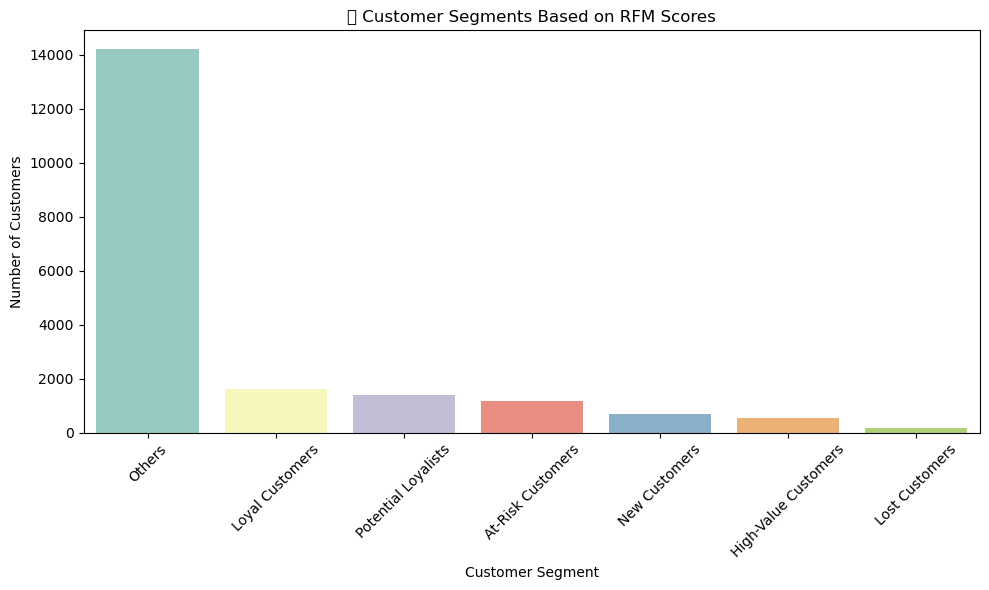

📋 Customer Segment Counts:

Customer_Segment
Others                  14193
Loyal Customers          1625
Potential Loyalists      1385
At-Risk Customers        1165
New Customers             696
High-Value Customers      551
Lost Customers            159
Name: count, dtype: int64

🎯 Marketing Recommendations:
• High-Value Customers → Reward with loyalty perks.
• Loyal Customers → Send exclusive product previews.
• At-Risk Customers → Use reminder and discount emails.
• New Customers → Nurture with onboarding offers.
• Lost Customers → Win-back with aggressive offers.
• Potential Loyalists → Encourage with reward points.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("ecommerce_data_final_cleaned.csv")

# --------------------------------------------
# Step 1: Format Date Column
# --------------------------------------------
# Replace with your actual date column
if 'order_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
elif 'date' in df.columns:
    df['order_date'] = pd.to_datetime(df['date'], errors='coerce')
else:
    raise Exception("❌ No valid date column found!")

df = df[df['order_date'].notnull()]

# --------------------------------------------
# Step 2: Prepare RFM Input
# --------------------------------------------
# Rename columns for consistency
df.rename(columns={
    'customer_id': 'CustomerID',
    'value [USD]': 'TotalRevenue'
}, inplace=True)

# Remove rows with missing values
df = df.dropna(subset=['CustomerID', 'order_date', 'TotalRevenue'])

# Reference date (latest date in dataset)
ref_date = df['order_date'].max()

# Group data by CustomerID
rfm = df.groupby('CustomerID').agg({
    'order_date': lambda x: (ref_date - x.max()).days,  # Recency
    'CustomerID': 'count',                             # Frequency
    'TotalRevenue': 'sum'                              # Monetary
}).rename(columns={
    'order_date': 'Recency',
    'CustomerID': 'Frequency',
    'TotalRevenue': 'Monetary'
}).reset_index()

# --------------------------------------------
# Step 3: Create RFM Score (1–5)
# --------------------------------------------
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# --------------------------------------------
# Step 4: Segment Customers Based on RFM Score
# --------------------------------------------
def assign_segment(row):
    r = int(row['R_Score'])
    f = int(row['F_Score'])
    m = int(row['M_Score'])

    if r == 5 and f == 5 and m == 5:
        return 'High-Value Customers'
    elif r >= 4 and f >= 4 and m >= 4:
        return 'Loyal Customers'
    elif r <= 2 and f >= 3 and m >= 3:
        return 'At-Risk Customers'
    elif r == 5 and f <= 2 and m <= 2:
        return 'New Customers'
    elif r == 1 and f == 1 and m == 1:
        return 'Lost Customers'
    elif r >= 4 and f >= 3 and m >= 3:
        return 'Potential Loyalists'
    else:
        return 'Others'

rfm['Customer_Segment'] = rfm.apply(assign_segment, axis=1)

# --------------------------------------------
# Step 5: Visualize Customer Segments
# --------------------------------------------
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='Customer_Segment', order=rfm['Customer_Segment'].value_counts().index, palette="Set3")
plt.title("📊 Customer Segments Based on RFM Scores")
plt.ylabel("Number of Customers")
plt.xlabel("Customer Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --------------------------------------------
# Step 6: Insights & Marketing Strategy
# --------------------------------------------
print("📋 Customer Segment Counts:\n")
print(rfm['Customer_Segment'].value_counts())

print("\n🎯 Marketing Recommendations:")
print("• High-Value Customers → Reward with loyalty perks.")
print("• Loyal Customers → Send exclusive product previews.")
print("• At-Risk Customers → Use reminder and discount emails.")
print("• New Customers → Nurture with onboarding offers.")
print("• Lost Customers → Win-back with aggressive offers.")
print("• Potential Loyalists → Encourage with reward points.")
